<a href="https://colab.research.google.com/github/EduEnthusiast/CNN-model-completed/blob/main/Dogvs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

In [ ]:


# ---- Parameters ----
IMG_SIZE = (150, 150)
BATCH_SIZE = 32
EPOCHS = 60

# ✅ Google Drive dataset path
DATA_DIR = "/content/drive/MyDrive/dogvscat"

# ---- Data Augmentation & Loading ----
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "train"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "train"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation"
)



Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
# ---- Build CNN Model ----
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu',
                  input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),# coverts 2d to 1d.
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# ---- Compile Model ----
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ---- Train Model ----
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 76s 5s/step - accuracy: 0.4944 - loss: 1.0213 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 2/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5549 - loss: 0.6921 - val_accuracy: 0.5000 - val_loss: 0.6922
Epoch 3/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.4765 - loss: 0.6943 - val_accuracy: 0.4500 - val_loss: 0.6936
Epoch 4/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5500 - loss: 0.6887 - val_accuracy: 0.5000 - val_loss: 0.6898
Epoch 5/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6225 - loss: 0.6717 - val_accuracy: 0.5200 - val_loss: 0.7150
Epoch 6/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5755 - loss: 0.6637 - val_accuracy: 0.5600 - val_loss: 0.6869
Epoch 7/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6148 - loss: 0.6501 - val_accuracy: 0.6200 - val_loss: 0.6775
Epoch 8/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5970 - loss: 0.6464 - val_accuracy: 0.5500 - val_loss:

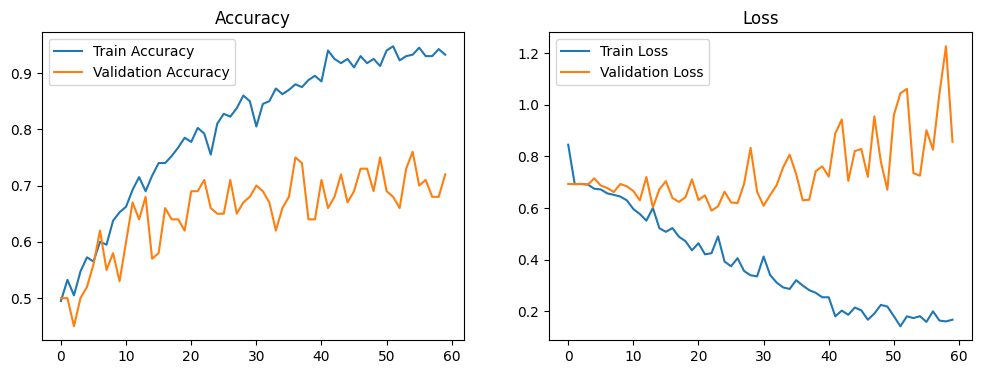

In [ ]:
# ---- Plot Accuracy & Loss ----
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")

plt.show()



In [ ]:
# ---- Save Model to Drive ----
model.save("/content/drive/MyDrive/dog_cat_cnn.h5")
print("Model saved in Google Drive ✅")

Model saved in Google Drive ✅


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 556ms/step


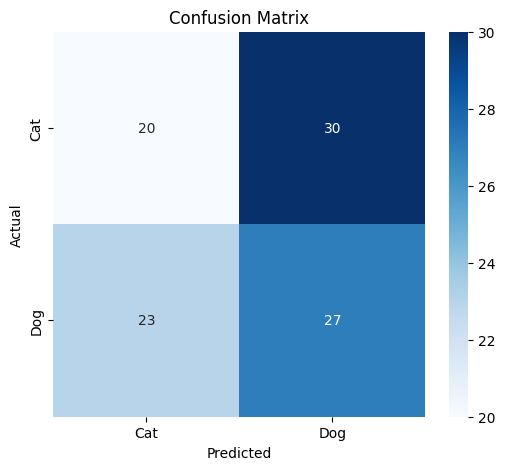

Classification Report:

              precision    recall  f1-score   support

         Cat       0.47      0.40      0.43        50
         Dog       0.47      0.54      0.50        50

    accuracy                           0.47       100
   macro avg       0.47      0.47      0.47       100
weighted avg       0.47      0.47      0.47       100



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get true labels & predictions
val_generator.reset()
y_true = val_generator.classes
y_pred_prob = model.predict(val_generator)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Cat', 'Dog'],
            yticklabels=['Cat', 'Dog'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=['Cat','Dog']))


In [ ]:
print(train_generator.class_indices)


{'0': 0, '1': 1}


In [ ]:
loss, acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {acc*100:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 558ms/step - accuracy: 0.6918 - loss: 0.9985
Validation Accuracy: 68.00%


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_single_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]

    if prediction > 0.5:
        print(f"Prediction: DOG 🐶 (Confidence: {prediction:.2f})")
    else:
        print(f"Prediction: CAT 🐱 (Confidence: {1-prediction:.2f})")

# Example
predict_single_image("/content/drive/MyDrive/dogvscat/test/1/268.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
Prediction: DOG 🐶 (Confidence: 1.00)
